<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


In this lab, I will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




Download the database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-11-03 13:24:07--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
connected. to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... 
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  47.7MB/s    in 3.6s    

2025-11-03 13:24:11 (42.2 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [2]:
!pip install pandas 
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [3]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [4]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [5]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [6]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [7]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,survey
1,main


## Running a Group By Query
    
I can group data by a specific column, like Age, to get the count of respondents in each age group:


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Describing a table

Use this query to get the schema of a specific table, main in this case:


In [9]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


Tables in the database: [('main',), ('survey',)]


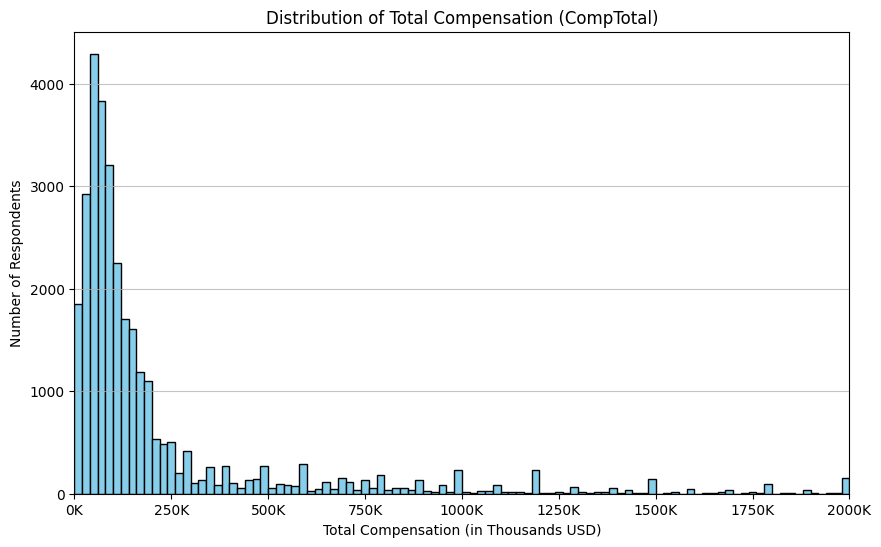

In [10]:
# Load the CSV
df = pd.read_csv('survey-data.csv')

# Connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Create a table named 'survey' from the DataFrame
df.to_sql('survey', conn, if_exists='replace', index=False)

# Verify
tables = conn.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()
print("Tables in the database:", tables)  # Should show [('survey',)]

query = """
SELECT CompTotal 
FROM survey
WHERE CompTotal IS NOT NULL AND CompTotal > 0
"""
df_comp = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Ensure CompTotal is numeric
df_comp['CompTotal'] = pd.to_numeric(df_comp['CompTotal'], errors='coerce')

# Filter compensation between 0 and 2,000,000 to be able to see the bulk of the distribution
df_filtered = df_comp[(df_comp['CompTotal'] > 0) & (df_comp['CompTotal'] <= 2_000_000)]

# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(df_filtered['CompTotal'], bins=100, edgecolor='black', color='skyblue')
plt.title('Distribution of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation (in Thousands USD)')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', alpha=0.75)

# Format x-axis to show thousands instead of scientific notation
plt.ticklabel_format(axis='x', style='plain')
xticks = plt.xticks()[0]
plt.xticks(xticks, [f'{int(x/1000)}K' for x in xticks])

# Start at 0 and go up to 2,000,000
plt.xlim(0, 2_000_000)

plt.show()

**Box Plots**

Plot a box plot of Age.


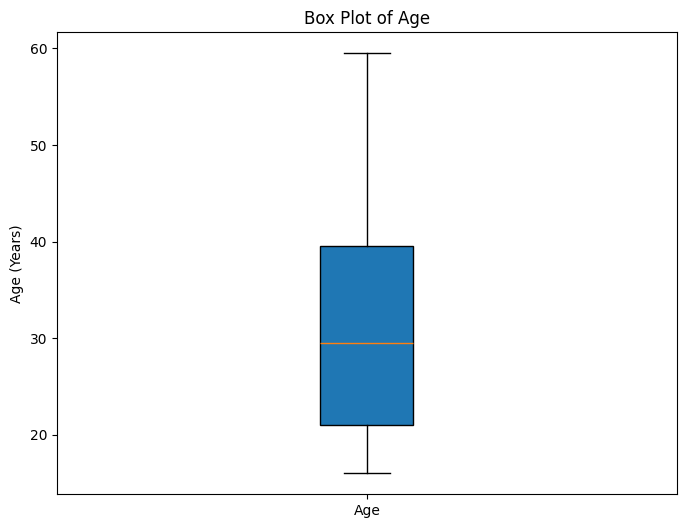

In [11]:
# Connect to SQLite
conn = sqlite3.connect('survey-data.sqlite')
query = "SELECT Age FROM survey WHERE Age IS NOT NULL;"
df_age = pd.read_sql_query(query, conn)
conn.close()

# Define age mapping (including 'years old')
age_map = {
    "Under 18 years old": 16,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65-74 years old": 69.5,
    "75-84 years old": 79.5,
    "85 years or older": 90
}

# Map Age to numeric values
df_age['AgeNumeric'] = df_age['Age'].map(age_map)

# Drop unmapped values (if some are weird)
df_age = df_age.dropna(subset=['AgeNumeric'])

# Plot box plot
plt.figure(figsize=(8,6))
plt.boxplot(df_age['AgeNumeric'], vert=True, patch_artist=True, tick_labels=['Age'])
plt.title('Box Plot of Age')
plt.ylabel('Age (Years)')
plt.show()


### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


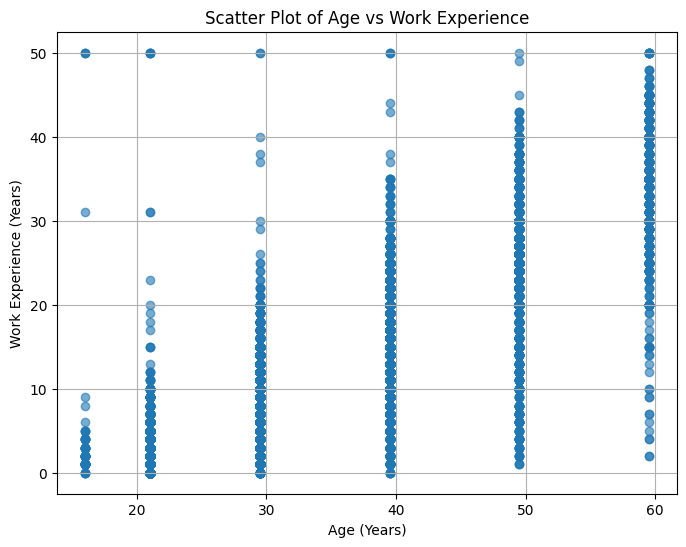

In [12]:
# Connect to SQLite
conn = sqlite3.connect('survey-data.sqlite')

# Query Age and WorkExp columns, remove NULLs
query = """
SELECT Age, WorkExp 
FROM survey 
WHERE Age IS NOT NULL AND WorkExp IS NOT NULL;
"""
df = pd.read_sql_query(query, conn)
conn.close()

# Define age mapping (including 'years old')
age_map = {
    "Under 18 years old": 16,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65-74 years old": 69.5,
    "75-84 years old": 79.5,
    "85 years or older": 90
}

# Map Age to numeric
df['AgeNumeric'] = df['Age'].map(age_map)

# Drop unmapped values
df = df.dropna(subset=['AgeNumeric', 'WorkExp'])

# Plot scatter plot
plt.figure(figsize=(8,6))
plt.scatter(df['AgeNumeric'], df['WorkExp'], alpha=0.6)
plt.title('Scatter Plot of Age vs Work Experience')
plt.xlabel('Age (Years)')
plt.ylabel('Work Experience (Years)')
plt.grid(True)
plt.show()


**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


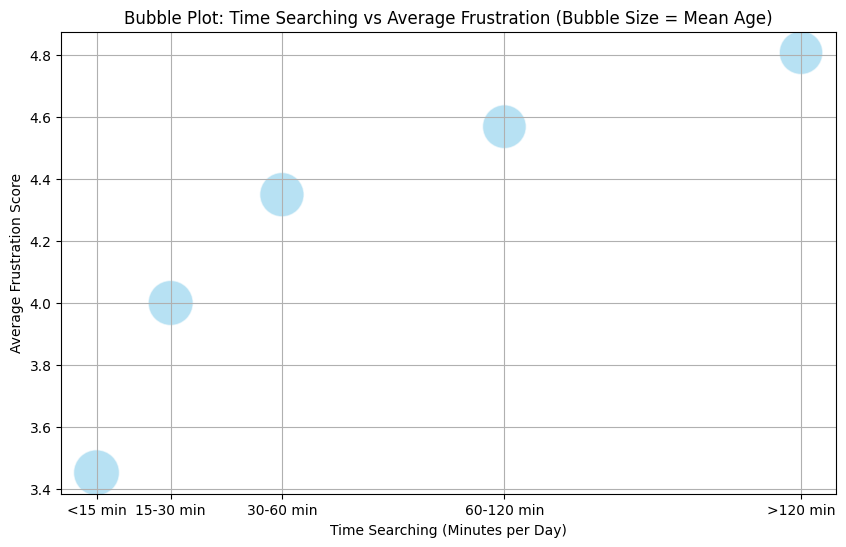

In [13]:
## Since Frustration is a free-text, I'll have to Convert Frustration to a numeric score:
# Count theme keywords per response (gives an idea on the intensity of frustration).
import sqlite3, pandas as pd, re, matplotlib.pyplot as plt

# --- Load data ---
conn = sqlite3.connect('survey-data.sqlite')
df = pd.read_sql_query("""
    SELECT Age, TimeSearching, Frustration
    FROM survey
    WHERE Age IS NOT NULL AND TimeSearching IS NOT NULL AND Frustration IS NOT NULL
""", conn)
conn.close()

# --- Map Age and TimeSearching to numeric midpoints ---
age_map = {"Under 18 years old":16,"18-24 years old":21,"25-34 years old":29.5,
           "35-44 years old":39.5,"45-54 years old":49.5,"55-64 years old":59.5,
           "65-74 years old":69.5,"75-84 years old":79.5,"85 years or older":90}
time_map = {"Less than 15 minutes a day":7.5,"15-30 minutes a day":22.5,
            "30-60 minutes a day":45,"60-120 minutes a day":90,"Over 120 minutes a day":150}
df['AgeNumeric'] = df['Age'].map(age_map)
df['TimeNumeric'] = df['TimeSearching'].map(time_map)

# --- Define frustration themes ---
themes = {
    "Technical/Stack": ["tech","stack","technical","software","code"],
    "Tools/Systems": ["tools","toolssystems","systemsplatforms"],
    "Security": ["security"],
    "Deployment/Build": ["deploymentcomplexity","build","components"],
    "Debt/Complexity": ["debtcomplexity","debttracking","debtnumber"]
}

# --- Compute numeric FrustrationScore based on keyword counts ---
def frustration_score(text):
    words = re.sub(r'[^a-zA-Z\s]','',text.lower()).split()
    return sum(words.count(k) for keywords in themes.values() for k in keywords)

df['FrustrationScore'] = df['Frustration'].apply(frustration_score)

# --- Aggregate by TimeSearching using mean age ---
agg = df.groupby('TimeNumeric').agg({
    'FrustrationScore':'mean',   # y-axis
    'AgeNumeric':'mean'           # bubble size represents mean age
}).reset_index()

# --- Plot bubble chart ---
plt.figure(figsize=(10,6))
plt.scatter(
    agg['TimeNumeric'],
    agg['FrustrationScore'],
    s=agg['AgeNumeric']*30,     # Bubble size proportional to mean age
    alpha=0.6,
    c='skyblue',
    edgecolors='w'
)
plt.title('Bubble Plot: Time Searching vs Average Frustration (Bubble Size = Mean Age)')
plt.xlabel('Time Searching (Minutes per Day)')
plt.ylabel('Average Frustration Score')
plt.grid(True)

# --- X-axis labels ---
labels = {7.5:"<15 min", 22.5:"15-30 min", 45:"30-60 min", 90:"60-120 min", 150:">120 min"}
plt.xticks(ticks=agg['TimeNumeric'], labels=[labels[x] for x in agg['TimeNumeric']])

plt.show()



### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


DatabaseWantToWorkWith
PostgreSQL    24005
SQLite        13489
MySQL         12269
MongoDB       10982
Redis         10847
Name: count, dtype: int64


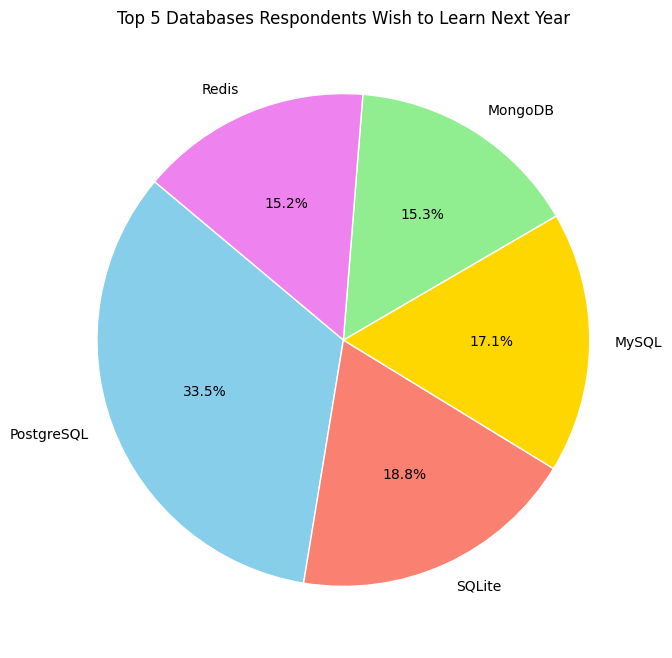

In [14]:
# --- Load data ---
conn = sqlite3.connect('survey-data.sqlite')
df = pd.read_sql_query("""
    SELECT DatabaseWantToWorkWith
    FROM survey
    WHERE DatabaseWantToWorkWith IS NOT NULL
""", conn)
conn.close()

# --- Split combined entries ---
# Some responses have multiple databases separated by ";"
all_dbs = df['DatabaseWantToWorkWith'].str.split(';').explode()

# --- Count occurrences and get top 5 ---
top5 = all_dbs.value_counts().nlargest(5)
print(top5)

# --- Plot pie chart ---
plt.figure(figsize=(8,8))
plt.pie(
    top5,
    labels=top5.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['skyblue','salmon','gold','lightgreen','violet'],
    wedgeprops={'edgecolor':'white'}
)
plt.title('Top 5 Databases Respondents Wish to Learn Next Year')
plt.show()


**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


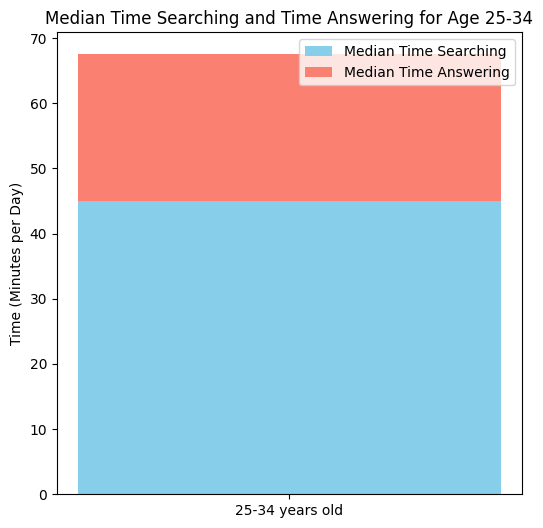

In [15]:
# --- Load data ---
conn = sqlite3.connect('survey-data.sqlite')
df = pd.read_sql_query("""
    SELECT Age, TimeSearching, TimeAnswering
    FROM survey
    WHERE Age IS NOT NULL AND TimeSearching IS NOT NULL AND TimeAnswering IS NOT NULL
""", conn)
conn.close()

# --- Map TimeSearching and TimeAnswering to numeric midpoints ---
time_map = {
    "Less than 15 minutes a day": 7.5, "15-30 minutes a day": 22.5,
    "30-60 minutes a day": 45, "60-120 minutes a day": 90, "Over 120 minutes a day": 150
}
df['TimeSearchingNum'] = df['TimeSearching'].map(time_map)
df['TimeAnsweringNum'] = df['TimeAnswering'].map(time_map)

# --- Filter for 25-34 age category (We do not have data for an age group from 30 to 35) ---
age_group = df[df['Age'] == '25-34 years old']

# --- Compute medians ---
median_searching = age_group['TimeSearchingNum'].median()
median_answering = age_group['TimeAnsweringNum'].median()

# --- Plot stacked bar chart ---
plt.figure(figsize=(6,6))
plt.bar(
    ['25-34 years old'],
    [median_searching],
    label='Median Time Searching',
    color='skyblue'
)
plt.bar(
    ['25-34 years old'],
    [median_answering],
    bottom=[median_searching],
    label='Median Time Answering',
    color='salmon'
)

plt.ylabel('Time (Minutes per Day)')
plt.title('Median Time Searching and Time Answering for Age 25-34')
plt.legend()
plt.show()


### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


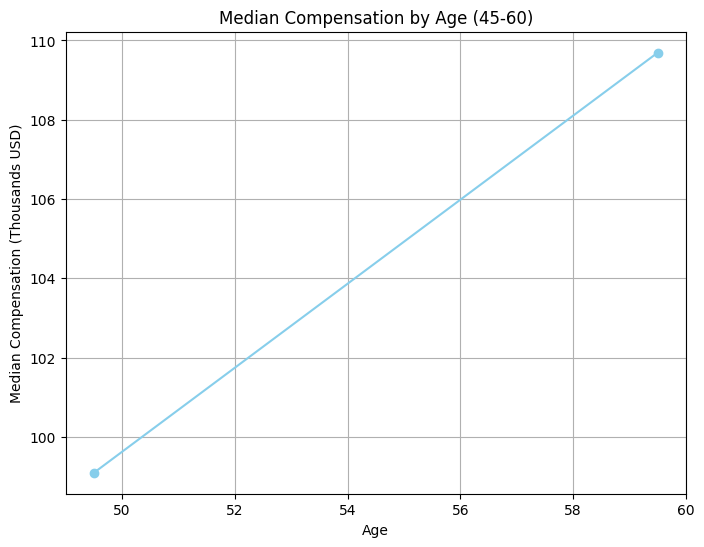

In [16]:
# --- Load data ---
conn = sqlite3.connect('survey-data.sqlite')
df = pd.read_sql_query("""
    SELECT Age, ConvertedCompYearly
    FROM survey
    WHERE Age IS NOT NULL AND ConvertedCompYearly IS NOT NULL
""", conn)
conn.close()

# --- Map age categories to numeric midpoints ---
age_map = {
    "Under 18 years old": 16, "18-24 years old": 21, "25-34 years old": 29.5,
    "35-44 years old": 39.5, "45-54 years old": 49.5, "55-64 years old": 59.5,
    "65-74 years old": 69.5, "75-84 years old": 79.5, "85 years or older": 90
}
df['AgeNumeric'] = df['Age'].map(age_map)

# --- Filter for ages 45 to 60 ---
df_filtered = df[(df['AgeNumeric'] >= 45) & (df['AgeNumeric'] <= 60)]

# --- Compute median CompTotal for each age category ---
median_comp = df_filtered.groupby('AgeNumeric')['ConvertedCompYearly'].median().reset_index()

# --- Plot line chart ---
plt.figure(figsize=(8,6))
plt.plot(
    median_comp['AgeNumeric'],
    median_comp['ConvertedCompYearly']/1000,  # Convert to thousands
    marker='o',
    linestyle='-',
    color='skyblue'
)
plt.xlabel('Age')
plt.ylabel('Median Compensation (Thousands USD)')
plt.title('Median Compensation by Age (45-60)')
plt.grid(True)
plt.show()


**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


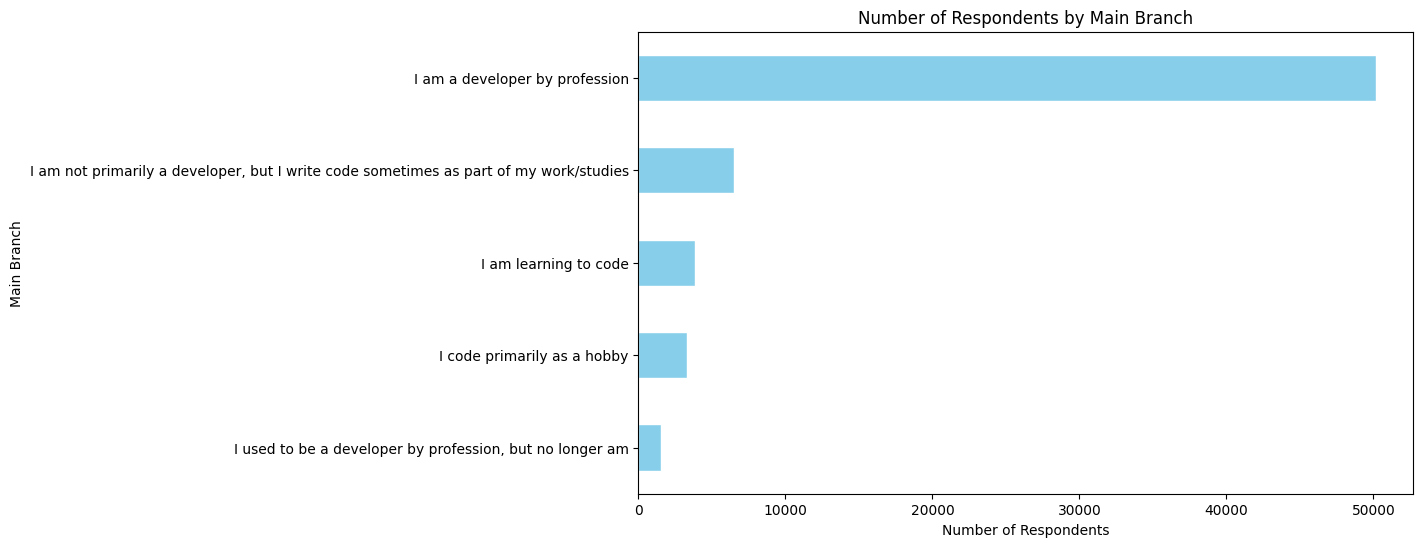

In [49]:
# --- Load data ---
conn = sqlite3.connect('survey-data.sqlite')
df = pd.read_sql_query("""
    SELECT MainBranch
    FROM survey
    WHERE MainBranch IS NOT NULL
""", conn)
conn.close()

# --- Count responses ---
branch_counts = df['MainBranch'].value_counts()

# --- Plot horizontal bar chart ---
plt.figure(figsize=(10,6))
branch_counts.plot(kind='barh', color='skyblue', edgecolor='white')
plt.xlabel('Number of Respondents')
plt.ylabel('Main Branch')
plt.title('Number of Respondents by Main Branch')
plt.gca().invert_yaxis()  # Largest bar on top
plt.show()


### Summary


In this lab, I focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. I applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [17]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
